In [1]:
from optimizer import Optimizer
from heuristics import * 
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
random.seed(42)
np.random.seed(42)

In [3]:
results = []

In [4]:
def get_dynamic_parameters(num_parts = 10):

    group_length = 2
    max_time_machine_A = 24000 + ((num_parts - 10) * 4000)
    max_time_machine_B = 22000

    demand = {p: 50 for p in range(1, num_parts + 1)}
    demand[num_parts + 1] = 0
    demand[num_parts + 2] = 0

    color_cost = {
        'Red': 10, 'Blue': 10, 'Green': 10, 'Yellow': 10,
        'Black': 10, 'Pink': 10, 'Purple': 10,
    }

    parts_colors = {i: random.choice(list(color_cost.keys())) for i in range(1, num_parts + 1)}

    alpha = [[abs(1 - (parts_colors[p] == parts_colors[q])) for q in range(1, num_parts + 1)] for p in range(1, num_parts + 1)]
    unit_production_time = 80
    cleaning_time = 80

    machines = [1,2]

    return {
        "num_parts": num_parts,
        "group_length": group_length,
        "max_time_machine_A": max_time_machine_A,
        "max_time_machine_B": max_time_machine_B,
        "demand": demand,
        "parts_colors": parts_colors,
        "alpha": alpha,
        "unit_production_time": unit_production_time,
        "cleaning_time": cleaning_time,
        "machines": machines,
    }

In [5]:
for num_parts in range(10, 21, 5):
    problem_parameters = get_dynamic_parameters(num_parts)

    tabu = TabuSearchScheduler(tabu_tenure=10, max_iterations=100, **problem_parameters)
    best_solution, best_value, elapsed_time = tabu()
    results.append( ["Tabu Search", best_value, round(elapsed_time, 4), num_parts] )
    
    proposed_optimizer = Optimizer(**problem_parameters)
    proposed_model, proposed_objective_value, optimization_time = proposed_optimizer(best_solution)
    results.append( ["Proposed Optimizer", proposed_objective_value, round(optimization_time, 4), num_parts])
    
    benchmark_optimizer = Optimizer(**problem_parameters)
    benchmark_model, benchmark_objective_value, optimization_time = benchmark_optimizer()
    results.append(["Benchmark Optimizer", benchmark_objective_value, round(optimization_time, 4), num_parts])

results_df = pd.DataFrame(results, columns=["Algorithm", "Objective Value", "Time", "Number of Parts"])

Set parameter Username
Set parameter LicenseID to value 2581974
Academic license - for non-commercial use only - expires 2025-11-11
Set parameter IntFeasTol to value 1e-09
Set parameter Threads to value 8
Set parameter Seed to value 12345
Set parameter MIPGap to value 0.05
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[arm] - Darwin 24.2.0 24C101)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 608 rows, 312 columns and 4172 nonzeros
Model fingerprint: 0x08d58aa6
Variable types: 24 continuous, 288 integer (288 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+04]

Loaded user MIP start with objective 5

Presolve removed 206 rows and 92 columns
Presolve time: 0.01s
Presolved: 402 rows, 220 columns, 4580 nonzeros
Variable types: 20 continuous, 200 integer (200 binary)

Root relaxation: objective 

## Visualization

In [6]:
results_df

,Algorithm,Objective Value,Time,Number of Parts
0,Tabu Search,5.0,0.0110,10
1,Proposed Optimizer,3.0,0.2051,10
2,Benchmark Optimizer,3.0,0.2625,10
3,Tabu Search,6.0,0.0123,15
4,Proposed Optimizer,3.0,1.5120,15
5,Benchmark Optimizer,3.0,0.7189,15
6,Tabu Search,9.0,0.0208,20
7,Proposed Optimizer,5.0,2.7577,20
8,Benchmark Optimizer,5.0,9.5814,20


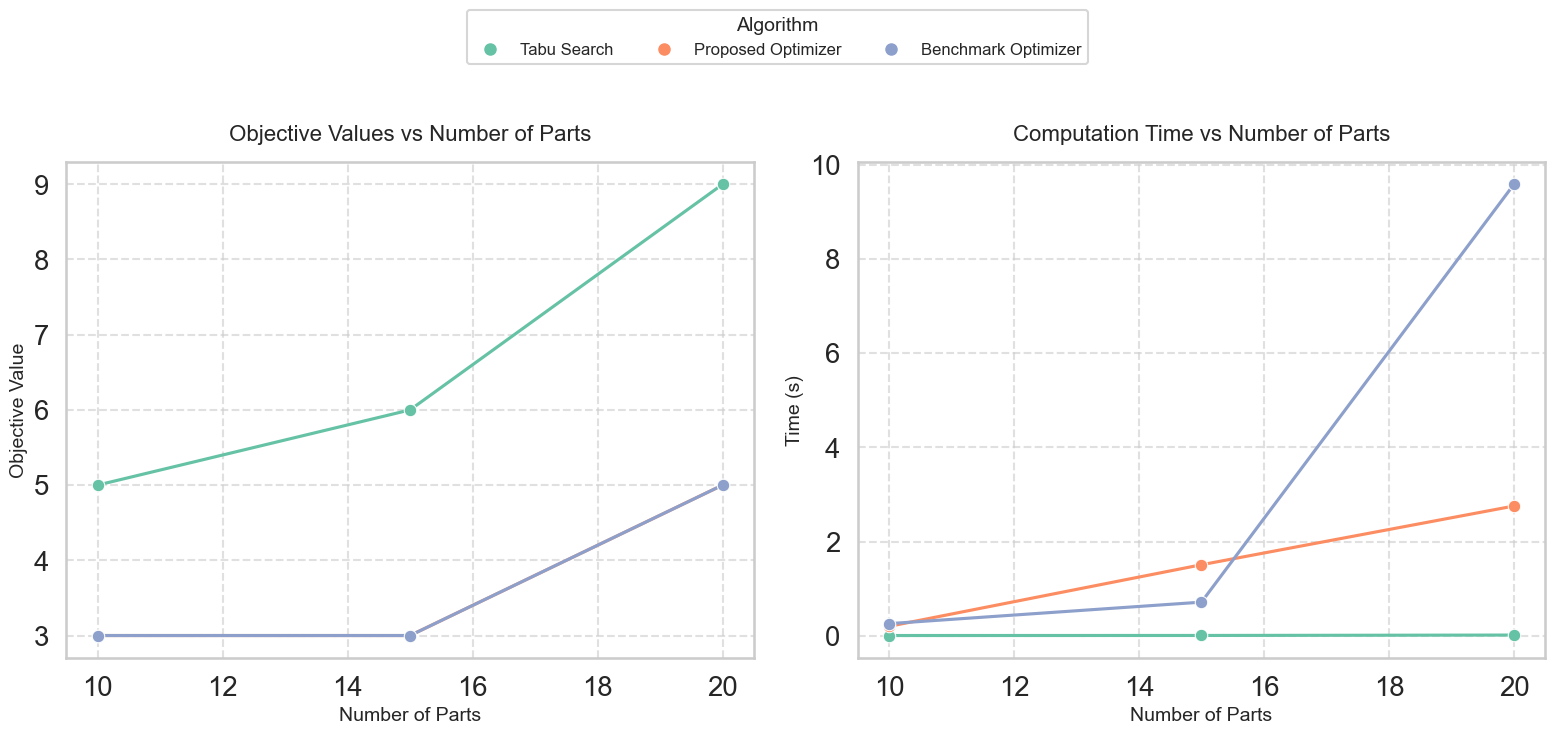

In [7]:
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("talk", font_scale=1.2)
sns.set_palette("Set2")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

sns.lineplot(
    data=results_df, x='Number of Parts', y='Objective Value', 
    hue='Algorithm', marker='o', ax=ax1, legend=False
)

ax1.set_title("Objective Values vs Number of Parts", fontsize=16, pad=15)
ax1.set_xlabel("Number of Parts", fontsize=14)
ax1.set_ylabel("Objective Value", fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)

sns.lineplot(
    data=results_df, x='Number of Parts', y='Time', 
    hue='Algorithm', marker='o', ax=ax2, legend=False
)
ax2.set_title("Computation Time vs Number of Parts", fontsize=16, pad=15)
ax2.set_xlabel("Number of Parts", fontsize=14)
ax2.set_ylabel("Time (s)", fontsize=14)
ax2.grid(True, linestyle='--', alpha=0.6)


algorithms = results_df['Algorithm'].unique()
palette = sns.color_palette("Set2", len(algorithms))

custom_lines = [
    plt.Line2D([0], [0], color=color, marker='o', linestyle='', markersize=8) 
    for color in palette
]
fig.legend(
    custom_lines, algorithms, title="Algorithm", loc='upper center', bbox_to_anchor=(0.5, 1.08),
    ncol=3, fontsize=12, title_fontsize=14
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

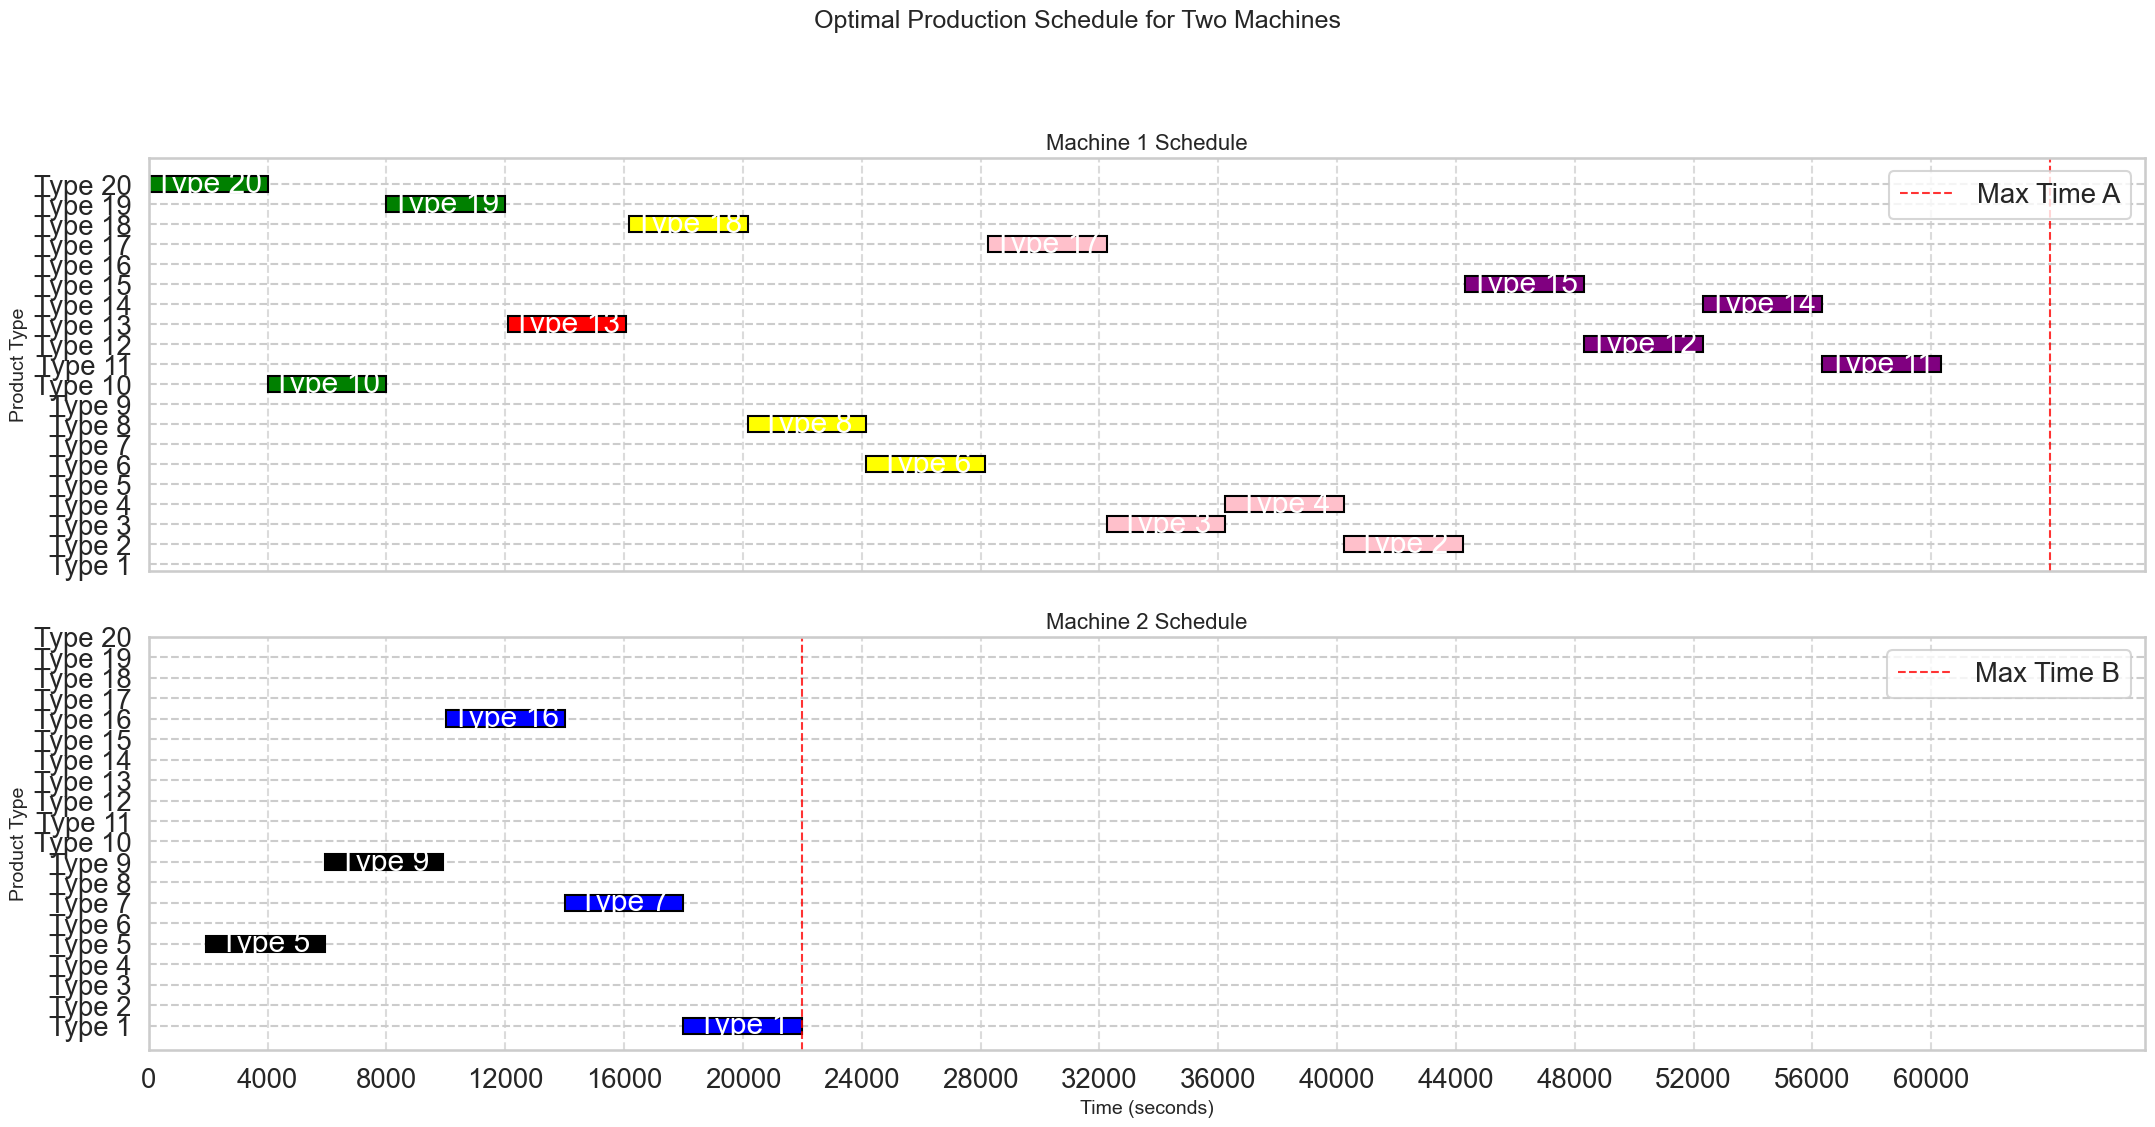

In [8]:
benchmark_optimizer.visualize()

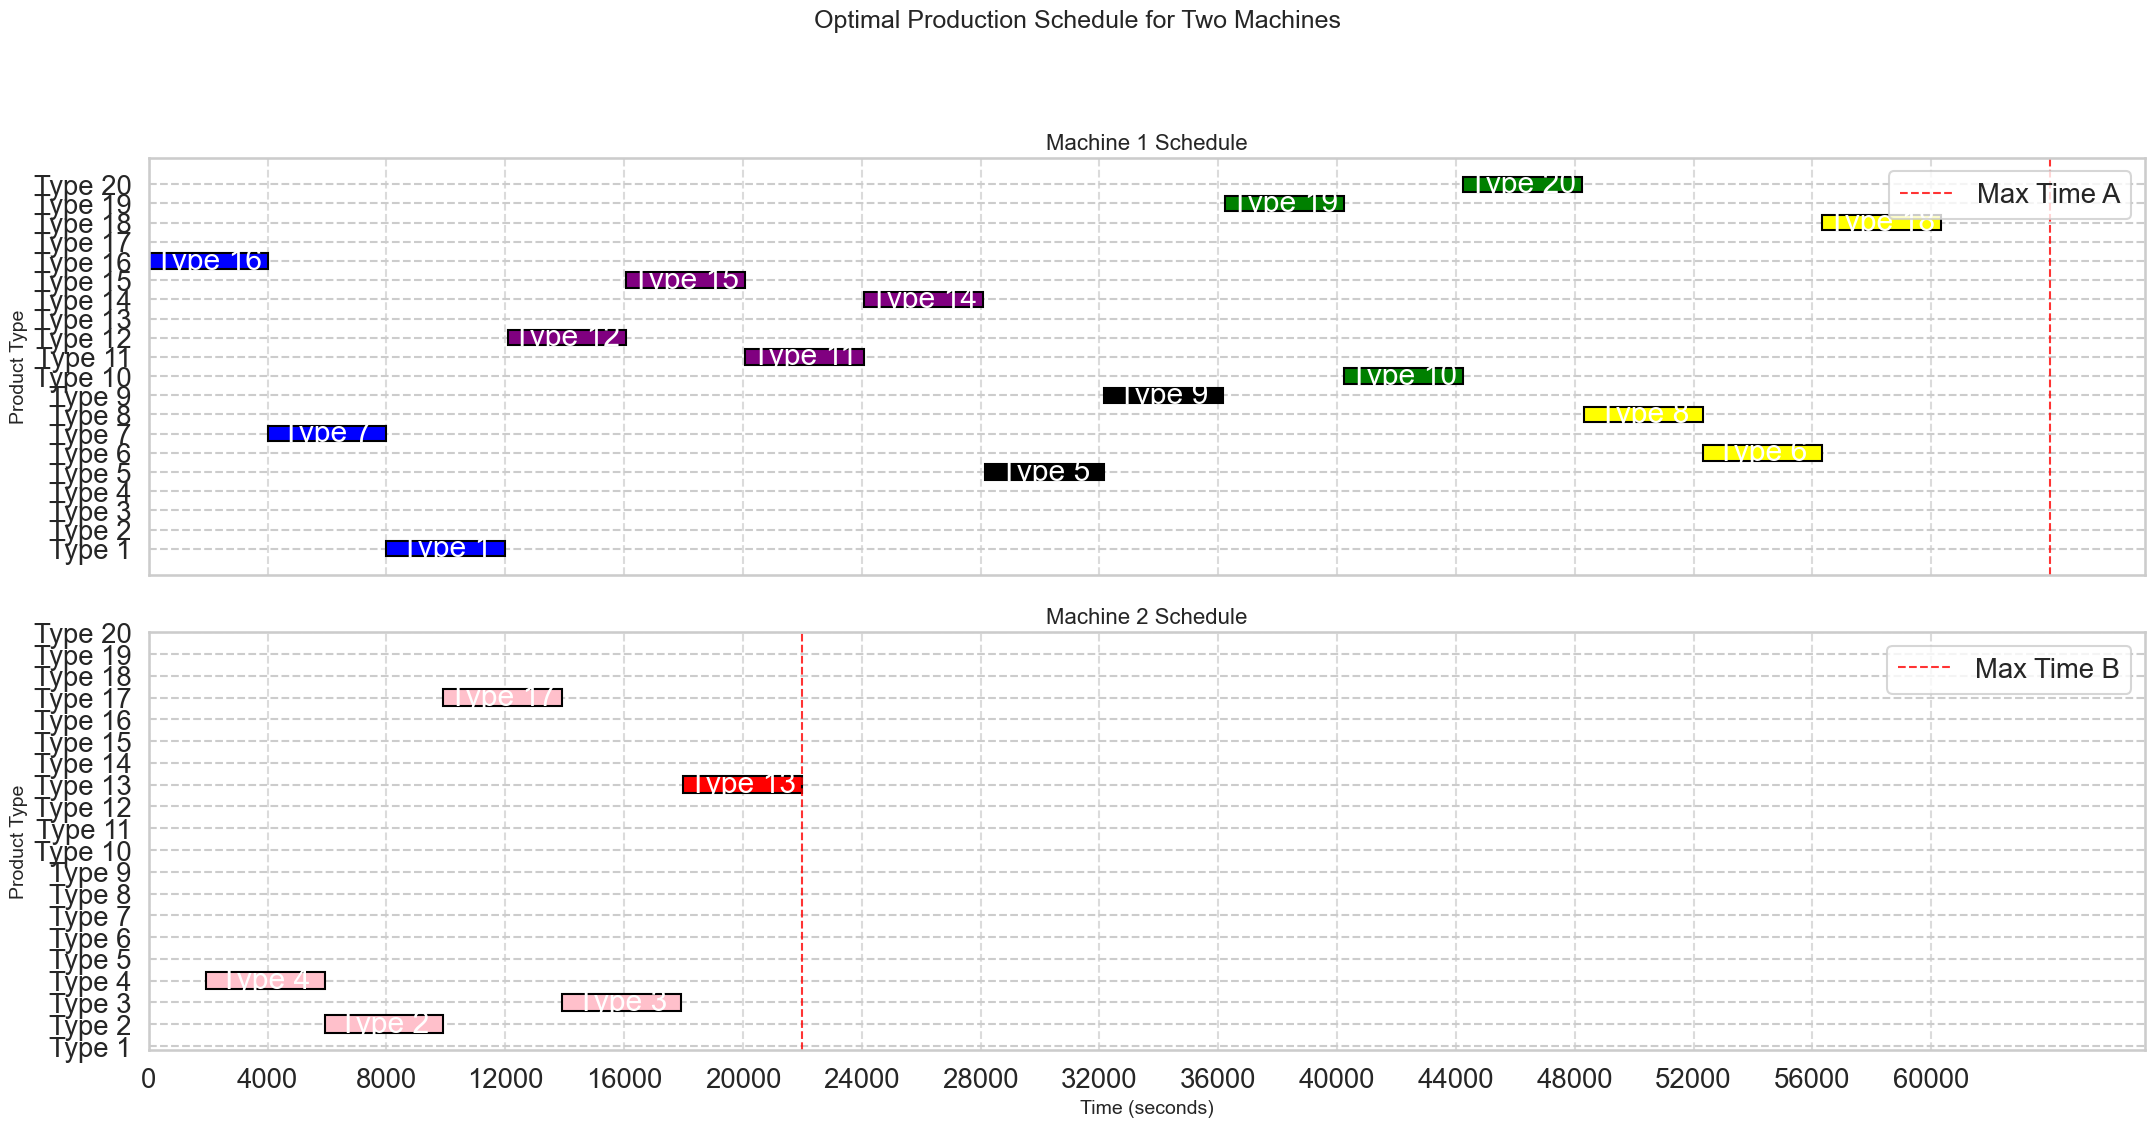

In [9]:
proposed_optimizer.visualize()

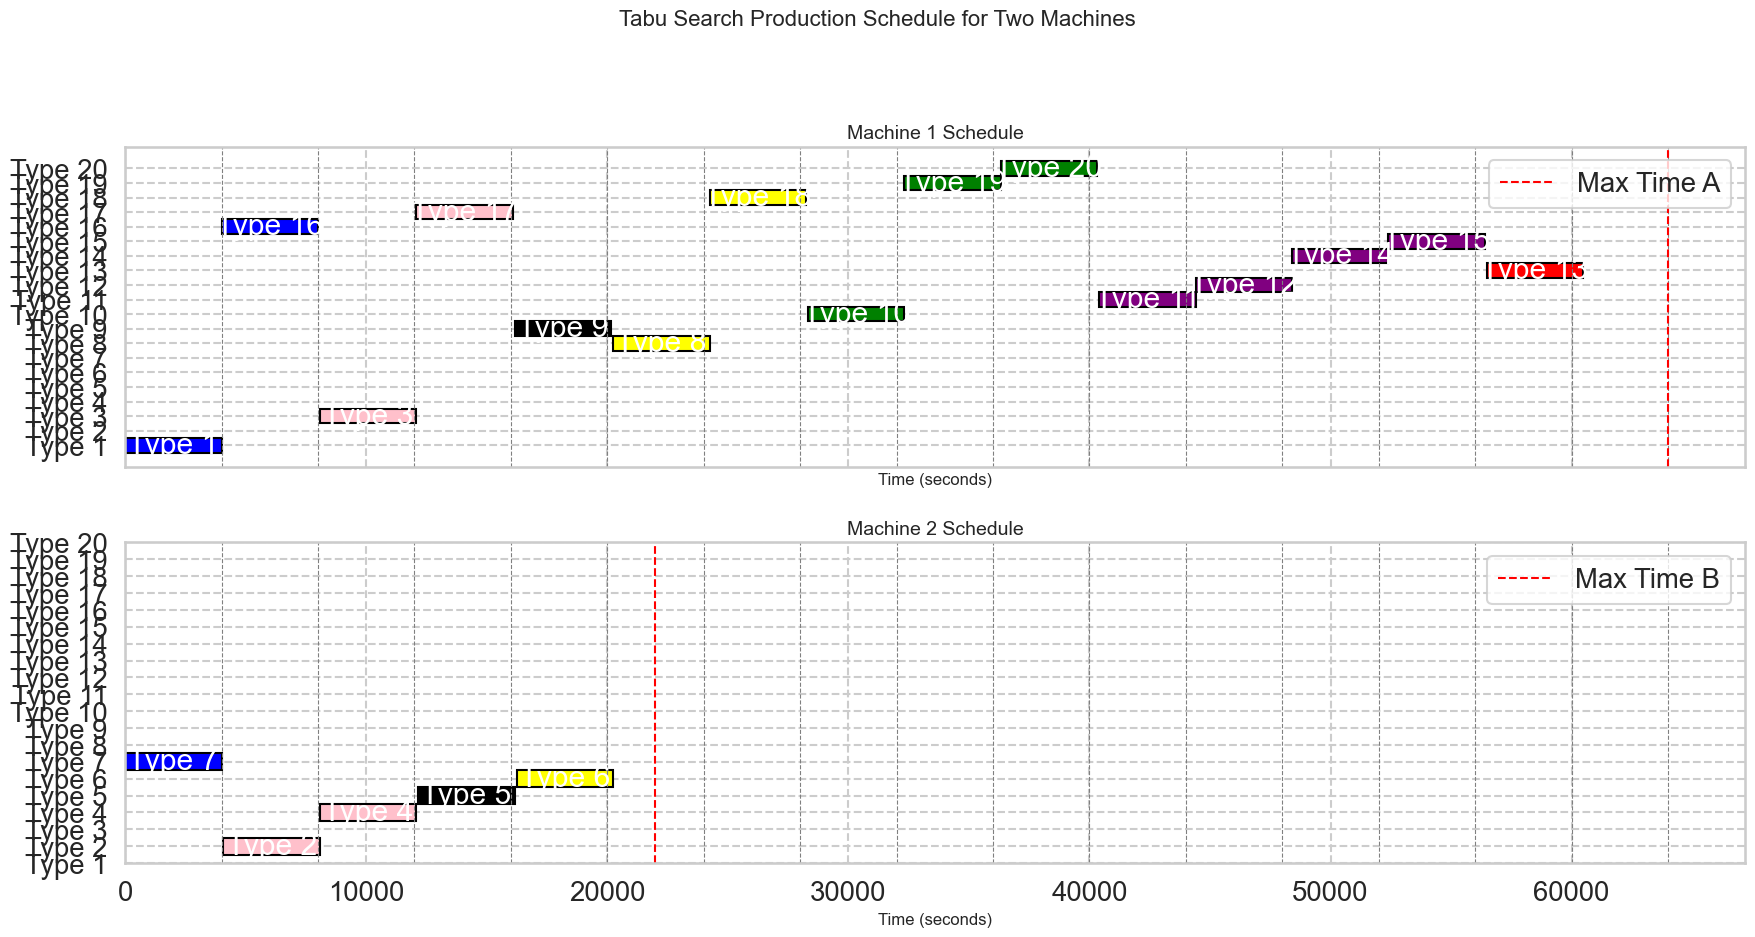

In [10]:
tabu.visualize()